<a href="https://colab.research.google.com/github/aneesh98/TMDBBoxOfficePreds/blob/master/TMDBBoxOffice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!chmod +x kagglesetup.sh
!./kagglesetup.sh c tmdb-box-office-prediction

  0% 0.00/60.1k [00:00<?, ?B/s]
100% 60.1k/60.1k [00:00<00:00, 52.2MB/s]
 71% 5.00M/7.05M [00:00<00:00, 51.6MB/s]
100% 7.05M/7.05M [00:00<00:00, 63.9MB/s]
 48% 5.00M/10.4M [00:00<00:00, 32.6MB/s]
100% 10.4M/10.4M [00:00<00:00, 50.8MB/s]


In [2]:
import os
!unzip train.csv.zip
!unzip test.csv.zip

Archive:  train.csv.zip
  inflating: train.csv               
Archive:  test.csv.zip
  inflating: test.csv                


In [3]:
import pandas as pd
import numpy as np
import ast
df_train = pd.read_csv('train.csv')
for i, e in enumerate(df_train['cast'][:5]):
  print(ast.literal_eval(e)[0]['character'])

Lou
Mia Thermopolis
Andrew Neimann
Vidya Bagchi
Chun-soo


In [4]:
df_train.head()

,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew,revenue
0,1,"[{'id': 313576, 'name': 'Hot Tub Time Machine ...",14000000,"[{'id': 35, 'name': 'Comedy'}]",NaN,tt2637294,en,Hot Tub Time Machine 2,"When Lou, who has become the ""father of the In...",6.575393,/tQtWuwvMf0hCc2QR2tkolwl7c3c.jpg,"[{'name': 'Paramount Pictures', 'id': 4}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",2/20/15,93.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The Laws of Space and Time are About to be Vio...,Hot Tub Time Machine 2,"[{'id': 4379, 'name': 'time travel'}, {'id': 9...","[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de...",12314651
1,2,"[{'id': 107674, 'name': 'The Princess Diaries ...",40000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,tt0368933,en,The Princess Diaries 2: Royal Engagement,Mia Thermopolis is now a college graduate and ...,8.248895,/w9Z7A0GHEhIp7etpj0vyKOeU1Wx.jpg,"[{'name': 'Walt Disney Pictures', 'id': 2}]","[{'iso_3166_1': 'US', 'name': 'United States o...",8/6/04,113.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,It can take a lifetime to find true love; she'...,The Princess Diaries 2: Royal Engagement,"[{'id': 2505, 'name': 'coronation'}, {'id': 42...","[{'cast_id': 1, 'character': 'Mia Thermopolis'...","[{'credit_id': '52fe43fe9251416c7502563d', 'de...",95149435
2,3,NaN,3300000,"[{'id': 18, 'name': 'Drama'}]",http://sonyclassics.com/whiplash/,tt2582802,en,Whiplash,"Under the direction of a ruthless instructor, ...",64.299990,/lIv1QinFqz4dlp5U4lQ6HaiskOZ.jpg,"[{'name': 'Bold Films', 'id': 2266}, {'name': ...","[{'iso_3166_1': 'US', 'name': 'United States o...",10/10/14,105.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The road to greatness can take you to the edge.,Whiplash,"[{'id': 1416, 'name': 'jazz'}, {'id': 1523, 'n...","[{'cast_id': 5, 'character': 'Andrew Neimann',...","[{'credit_id': '54d5356ec3a3683ba0000039', 'de...",13092000
3,4,NaN,1200000,"[{'id': 53, 'name': 'Thriller'}, {'id': 18, 'n...",http://kahaanithefilm.com/,tt1821480,hi,Kahaani,Vidya Bagchi (Vidya Balan) arrives in Kolkata ...,3.174936,/aTXRaPrWSinhcmCrcfJK17urp3F.jpg,NaN,"[{'iso_3166_1': 'IN', 'name': 'India'}]",3/9/12,122.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,NaN,Kahaani,"[{'id': 10092, 'name': 'mystery'}, {'id': 1054...","[{'cast_id': 1, 'character': 'Vidya Bagchi', '...","[{'credit_id': '52fe48779251416c9108d6eb', 'de...",16000000
4,5,NaN,0,"[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...",NaN,tt1380152,ko,마린보이,Marine Boy is the story of a former national s...,1.148070,/m22s7zvkVFDU9ir56PiiqIEWFdT.jpg,NaN,"[{'iso_3166_1': 'KR', 'name': 'South Korea'}]",2/5/09,118.0,"[{'iso_639_1': 'ko', 'name': '한국어/조선말'}]",Released,NaN,Marine Boy,NaN,"[{'cast_id': 3, 'character': 'Chun-soo', 'cred...","[{'credit_id': '52fe464b9251416c75073b43', 'de...",3923970


Text(0, 0.5, 'Log Revenue')

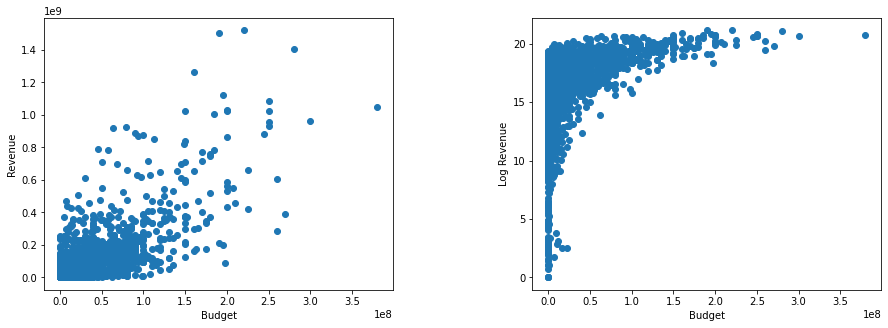

In [5]:
import matplotlib.pyplot as plt
log_revenue = np.log(df_train['revenue'])
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (15, 5))
fig.subplots_adjust(wspace = 0.4, hspace = 0.4)
ax1.scatter(df_train['budget'], df_train['revenue'])
ax1.set_xlabel('Budget')
ax1.set_ylabel('Revenue')
ax2.scatter(df_train['budget'], log_revenue)
ax2.set_xlabel('Budget')
ax2.set_ylabel('Log Revenue')

Text(0, 0.5, 'Log Revenue')

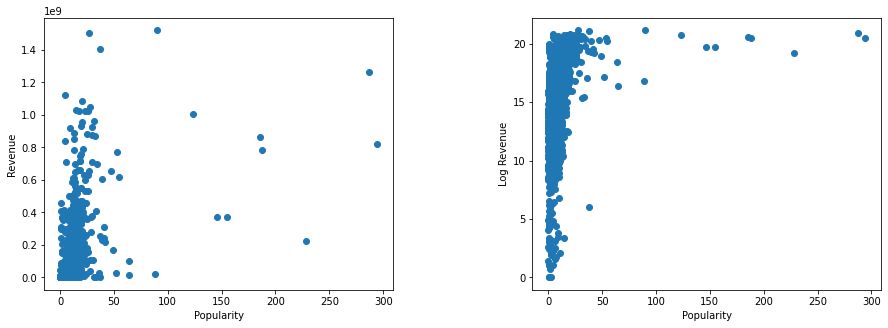

In [6]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (15, 5))
fig.subplots_adjust(wspace = 0.4, hspace = 0.4)
ax1.scatter(df_train['popularity'], df_train['revenue'])
ax1.set_xlabel('Popularity')
ax1.set_ylabel('Revenue')
ax2.scatter(df_train['popularity'], log_revenue)
ax2.set_xlabel('Popularity')
ax2.set_ylabel('Log Revenue')

What is the relation between the original language of the movie and its revenue ? We can visualize this using a boxplot

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


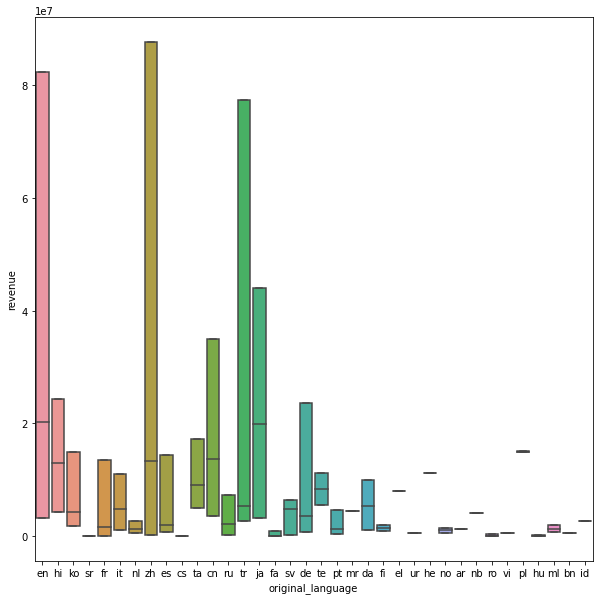

In [7]:
import seaborn as sns
plt.figure(figsize=(10, 10))
sns.boxplot(x = 'original_language', y = 'revenue', data = df_train, whis = 0.0, showfliers = False)

In [0]:
form = "%m/%d/%y"
temp = pd.to_datetime(df_train['release_date'], format = form)

In [0]:
df_train[['release_month', 'release_day', 'release_year']] = df_train['release_date'].str.split('/', expand = True)\
                                                                                                .replace(np.nan, -1)

In [0]:
df_train['release_month'] = df_train['release_month'].astype(int)
df_train['release_day'] = df_train['release_day'].astype(int)
df_train['release_year'] = df_train['release_year'].astype(int)
df_train.loc[(df_train['release_year'] <= 19) & (df_train['release_year'] < 100), "release_year"] += 2000
df_train.loc[(df_train['release_year'] > 19)  & (df_train['release_year'] < 100), "release_year"] += 1900                                                                     

In [11]:
indices = list([x - 1 for x in df_train.release_month.value_counts().index])
indices

[8, 9, 11, 7, 3, 2, 5, 1, 4, 10, 0, 6]

In [12]:
df_train.release_month.value_counts().sort_index()

1     212
2     226
3     238
4     245
5     224
6     237
7     209
8     256
9     362
10    307
11    221
12    263
Name: release_month, dtype: int64

In [13]:
import plotly.graph_objs as go
months = np.array(["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"])
# plt.bar(df_train['release_month'].value_counts().index, df_train['release_month'].value_counts().values,
#         color = 'red')
monthly_data = df_train.release_month.value_counts().sort_index()
idx = [x - 1 for x in monthly_data.index]
data = go.Bar(x = months[idx],
                y = monthly_data.values,
                marker = dict(color = monthly_data.values,
                             line=dict(color='rgb(0,0,0)',width=1.5))
                )
fig = go.Figure(data = data)
fig.show()

In [14]:
yearly_data = df_train.release_year.value_counts().sort_index()

data = go.Bar(x = yearly_data.index,
                y = yearly_data.values,
                marker = dict(color = yearly_data.values,
                             line=dict(color='rgb(0,0,0)',width=1.5))
                )
fig = go.Figure(data = data)
fig.update_layout(xaxis_tickangle = -90)
fig.show()

In [15]:
df_train[df_train['status'] == 'Rumored']

,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew,revenue,release_month,release_day,release_year
609,610,"[{'id': 144200, 'name': 'Swan Princess Series'...",0,"[{'id': 14, 'name': 'Fantasy'}, {'id': 16, 'na...",NaN,tt0120254,en,The Swan Princess: Escape from Castle Mountain,The first wedding anniversary of Princess Odet...,5.121309,/oTEgvTpAIugS7OH6oIoVZkmV3C3.jpg,NaN,NaN,1/1/97,71.0,"[{'iso_639_1': 'da', 'name': 'Dansk'}, {'iso_6...",Rumored,It Will Take All Her Magic to Rescue Her Friends!,The Swan Princess: Escape from Castle Mountain,"[{'id': 3071, 'name': 'prince'}, {'id': 4456, ...","[{'cast_id': 2, 'character': 'Odette (voice)',...","[{'credit_id': '52fe488bc3a36847f816cfd3', 'de...",273644,1,1,1997
1007,1008,NaN,0,"[{'id': 35, 'name': 'Comedy'}]",NaN,tt1860180,en,Billy Gardell: Halftime,"Billy Gardell, the star of CBS' hit comedy ""Mi...",0.007877,/3ypM4bwZTvUfXiKJTs0BaEZuBhe.jpg,NaN,"[{'iso_3166_1': 'US', 'name': 'United States o...",2/5/11,60.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Rumored,NaN,Billy Gardell: Halftime,NaN,"[{'cast_id': 9, 'character': 'Himself', 'credi...","[{'credit_id': '52fe4be1c3a368484e19d265', 'de...",60,2,5,2011
1216,1217,NaN,0,"[{'id': 18, 'name': 'Drama'}, {'id': 53, 'name...",NaN,tt0091024,en,Extremities,A woman escapes from the man who is about to r...,10.273979,/pMN14kaump5CrzbSl1C0a2E0M4f.jpg,"[{'name': 'Atlantic Entertainment Group', 'id'...","[{'iso_3166_1': 'US', 'name': 'United States o...",8/22/86,89.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Rumored,"When fear made her a victim, she turned fear i...",Extremities,"[{'id': 2483, 'name': 'nudity'}, {'id': 2539, ...","[{'cast_id': 1, 'character': 'Marjorie', 'cred...","[{'credit_id': '582cca1c925141780b00259f', 'de...",13418091,8,22,1986
1618,1619,NaN,891000,"[{'id': 99, 'name': 'Documentary'}]",NaN,tt0145394,en,A Place Called Chiapas,"On January 1, 1994, the Zapatista National Lib...",0.179246,/4j9U7QMT5D5HhUoIsoAI1niVqz8.jpg,NaN,"[{'iso_3166_1': 'CA', 'name': 'Canada'}]",2/20/98,89.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Rumored,Inside the world's first postmodern revolution,A Place Called Chiapas,"[{'id': 187056, 'name': 'woman director'}]","[{'cast_id': 1, 'character': 'Himself', 'credi...","[{'credit_id': '57b4f7619251417287000dfc', 'de...",229000,2,20,1998


In [0]:
from collections import Counter
def extract_values(text):
  values = []
  for list_of_values in text:
    if list_of_values != '':
      list_ = ast.literal_eval(list_of_values)
      for element in list_:
        value = element['name']
        values.append(value)
  count_values = Counter(values)
  return count_values

count_genres = extract_values(df_train['genres'].replace(np.nan, ""))

In [17]:
count_genres.keys()

dict_keys(['Comedy', 'Drama', 'Family', 'Romance', 'Thriller', 'Action', 'Animation', 'Adventure', 'Horror', 'Documentary', 'Music', 'Crime', 'Science Fiction', 'Mystery', 'Foreign', 'Fantasy', 'War', 'Western', 'History', 'TV Movie'])

In [0]:
x, y = zip(*count_genres.items())

***BAR PLOT OF GENRES***

We can see how many movies are present in each genre. Most of movies are drama movies.

In [19]:
data = go.Bar(x = x,
              y = y,
              marker = dict(color = 'rgb(255, 255, 0, 0.5)',
                             line=dict(color='rgb(0,0,0)',width=1.5))
              )
fig = go.Figure(data = data)
fig.show()

In [0]:
# CHECKING FOR NULL VALUES
nrows = df_train.shape[0]
null_check = df_train.isnull().sum()

In [0]:
pct_null = pd.DataFrame(null_check.sort_values(ascending = False) * 100 / nrows)

In [22]:
pct_null

,0
belongs_to_collection,79.866667
homepage,68.466667
tagline,19.900000
Keywords,9.200000
production_companies,5.200000
production_countries,1.833333
spoken_languages,0.666667
crew,0.533333
cast,0.433333
overview,0.266667


A VISUALIZATION OF COUNTRIES AND THEIR NUMBER OF FILMS

In [23]:
count_prod_comp = extract_values(df_train['production_countries'].replace(np.nan, ""))
x, y = zip(*count_prod_comp.items())
data = go.Bar(x = x,
              y = y,
              marker = dict(color = 'rgb(255, 255, 0, 0.5)',
                             line=dict(color='rgb(0,0,0)',width=1.5))
              )
fig = go.Figure(data = data)
fig.update_layout(width = 1000, height = 1000, xaxis = dict(tickmode = 'array',
                           tickvals = list(range(0, len(x))), 
                           ticktext = x))
fig.show()

In [24]:
year = df_train['release_year']
revenue = df_train.groupby('release_year')["revenue"].aggregate('mean')
data = go.Scatter(x=revenue.index, y=revenue.values,
                    mode='lines',
                    name='lines')
fig = go.Figure(data)
fig.update_layout(title = 'Year Vs Average Revenue',
                  xaxis_title = 'Year',
                  yaxis_title = 'Average Revenue')

In [25]:
year = df_train['release_year']
revenue = df_train.groupby('release_year')["runtime"].aggregate('mean')
data = go.Scatter(x=revenue.index, y=revenue.values,
                    mode='lines+markers',
                    name='lines')
fig = go.Figure(data)
fig.update_layout(title = 'Year Vs Runtime',
                  xaxis_title = 'Year',
                  yaxis_title = 'Runtime')

In [26]:
revenue = df_train.groupby('release_month')["revenue"].aggregate('mean')
data = go.Bar(x = months[np.array(revenue.index) - 1],
              y = revenue.values,
              marker = dict(color = 'rgba(255, 255, 0, 0.5)',
                             line=dict(color='rgb(0,0,0)',width=1.5))
              )
fig.update_layout(title = 'Month Vs Average Revenue',
                  xaxis_title = 'Month',
                  yaxis_title = 'Average Revenue')
fig = go.Figure(data = data)
fig.show()

The relative higher revenue in May & June may be due to vacations & Holidays

In [27]:
count_prod_companies = extract_values(df_train['production_companies'].replace(np.nan, ""))
print(pd.DataFrame({'Name':list(count_prod_companies.keys()), 'No. of Movies Produced':list(count_prod_companies.values())}).head())

                        Name  No. of Movies Produced
0         Paramount Pictures                     161
1             United Artists                      44
2  Metro-Goldwyn-Mayer (MGM)                      84
3       Walt Disney Pictures                      62
4                 Bold Films                       4


Do the Movies that have homepage have some impact on the Revenue? Let's Find Out


In [28]:
df_train['homepage'].isnull().value_counts()

True     2054
False     946
Name: homepage, dtype: int64

In [29]:
import plotly.express as px
import seaborn as sns
slice_data = df_train[['homepage', 'revenue']]
slice_data.loc[~slice_data['homepage'].isnull(), 'homepage'] = "With Homepage"
slice_data.loc[slice_data['homepage'].isnull(), 'homepage'] = "No Homepage"
fig = px.box(slice_data, x = "revenue", y = "homepage", orientation = 'h', points = 'suspectedoutliers')
fig.show()

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:966: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Well we can infer from above that movies with no homepage have relatively less revenue.

In [30]:
count_keywords = extract_values(df_train['Keywords'].replace(np.nan, ""))
vals = pd.DataFrame({'Keywords':list(count_keywords.keys()), 'Counts':list(count_keywords.values())})
### Looking at the top keywords in the film ### 
vals = vals.sort_values('Counts', ascending = False)
data = go.Bar(x = vals['Keywords'][:20],
              y = vals['Counts'][:20],
              marker = dict(color = 'rgba(255, 0, 0, 0.5)',
                             line=dict(color='rgb(0,0,0)',width=1.5))
              )
fig.update_layout(title = 'Keywords Vs Counts',
                  xaxis_title = 'Keywords',
                  yaxis_title = 'Counts')
fig = go.Figure(data = data)
fig.show()

In [31]:
count_spoken_languages = extract_values(df_train['spoken_languages'].replace(np.nan, ""))
vals = pd.DataFrame({'Languages':list(count_spoken_languages.keys()), 'Counts':list(count_spoken_languages.values())})
### Looking at the top keywords in the film ### 
vals = vals.sort_values('Counts', ascending = False)
data = go.Bar(x = vals['Languages'][1:20],
              y = vals['Counts'][1:20],
              marker = dict(color = 'rgba(255, 0, 0, 0.5)',
                             line=dict(color='rgb(0,0,0)',width=1.5))
              )
fig.update_layout(title = 'Languages Vs Counts',
                  xaxis_title = 'Languages',
                  yaxis_title = 'Counts')
fig = go.Figure(data = data)
fig.show()

In [32]:
!pip install googletrans

  Created wheel for googletrans: filename=googletrans-2.4.0-cp36-none-any.whl size=15777 sha256=43e5f2eb96ea41f16382fb38caf8d6751807471f34becac0e7ac3cd56274edef
  Stored in directory: /root/.cache/pip/wheels/50/d6/e7/a8efd5f2427d5eb258070048718fa56ee5ac57fd6f53505f95
Successfully built googletrans


In [33]:
from googletrans import Translator
translator = Translator()
count_spoken_languages = extract_values(df_train['spoken_languages'].replace(np.nan, ""))

vals = pd.DataFrame({'Languages':list(count_spoken_languages.keys()), 'Counts':list(count_spoken_languages.values())})
### Looking at the top keywords in the film ### 
vals = vals.sort_values('Counts', ascending = False)
for i in range(vals.shape[0]):
  vals.loc[i, 'Languages'] = translator.translate(vals.loc[i, 'Languages'], dest = 'en').text
data = go.Bar(x = vals['Languages'][1:20],
              y = vals['Counts'][1:20],
              marker = dict(color = 'rgba(255, 0, 0, 0.5)',
                             line=dict(color='rgb(0,0,0)',width=1.5))
              )
fig.update_layout(title = 'Languages Vs Counts',
                  xaxis_title = 'Languages',
                  yaxis_title = 'Counts')
fig = go.Figure(data = data)
fig.show()

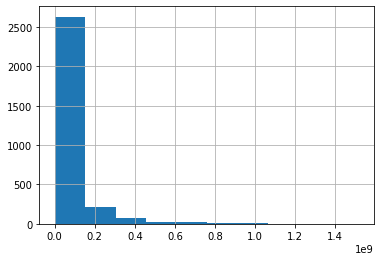

In [34]:
df_train['revenue'].hist()

Revenue is skewed

In [0]:
### NUMBER OF CAST VS REVENUE ###
def get_cast_length(row):
  l = ast.literal_eval(row)
  return len(l)
from sklearn.impute import SimpleImputer
si = SimpleImputer(fill_value = "[]")
df_train['cast'] = df_train['cast'].replace(np.nan, "[]")
df_train["cast"] = df_train['cast'].replace("","[]")

In [36]:
df_train["num_cast"] = df_train['cast'].apply(lambda x: get_cast_length(x))
df_train.loc[:,['num_cast','revenue']]

,num_cast,revenue
0,24,12314651
1,20,95149435
2,51,13092000
3,7,16000000
4,4,3923970
...,...,...
2995,15,1596687
2996,11,180590
2997,15,89456761
2998,26,171963386


In [66]:
from plotly.subplots import make_subplots
data = go.Scatter(x = df_train['num_cast'], y = np.log(df_train['revenue']), mode = 'markers',
                  marker = dict(color = 'rgba(255, 0, 0, 0.5)'))
fig = go.Figure(data = data)
params = {'title':'No. Of Cast Vs Revenue', 'xaxis_title':'num_cast', 'yaxis_title':'Log of Revenue'}
fig.update_layout(**params)
fig.show()

In [0]:
agg_data = df_train.groupby('original_language').aggregate({'revenue':np.mean})

**PLOT OF ORIGINAL LANGUAGE VS REVENUE**

In [65]:
langs = df_train['original_language'].unique()
fig = go.Figure()
for lang in langs:
  x = np.log(df_train.loc[df_train['original_language'] == lang, 'revenue'])
  name = lang
  fig.add_trace(go.Box(x = x,
                name = name,
                ))
fig.update_traces(orientation = 'h')
params = {'xaxis_title':'Revenue', 'yaxis_title':'Original Language', 'width':1000, 'height':1000}
fig.update_layout(**params)
fig.show()

In [0]:
from collections import defaultdict
genre_revenue_data = defaultdict(list)
for index, row in df_train.iterrows():
  try:
    genres = ast.literal_eval(row['genres'])
    for genre in genres:
      genre_revenue_data[genre['name']].append(row['revenue'])
  except ValueError:
    continue

In [41]:
genre_revenue_data.keys()

dict_keys(['Comedy', 'Drama', 'Family', 'Romance', 'Thriller', 'Action', 'Animation', 'Adventure', 'Horror', 'Documentary', 'Music', 'Crime', 'Science Fiction', 'Mystery', 'Foreign', 'Fantasy', 'War', 'Western', 'History', 'TV Movie'])

***PLOT OF GENRE VS REVENUE***

In [54]:
fig = go.Figure()
for genre in genre_revenue_data.keys():
  x = genre_revenue_data[genre]
  name = genre
  fig.add_trace(go.Box(x = x,
                name = name,
                ))
fig.update_traces(orientation = 'h')
params = {'xaxis_title':'Revenue', 'yaxis_title':'Genre','width':1000,'height':1000}
fig.update_layout(**params)
fig.show()

In [43]:
count_prod_companies.most_common(15)

[('Warner Bros.', 202),
 ('Universal Pictures', 188),
 ('Paramount Pictures', 161),
 ('Twentieth Century Fox Film Corporation', 138),
 ('Columbia Pictures', 91),
 ('Metro-Goldwyn-Mayer (MGM)', 84),
 ('New Line Cinema', 75),
 ('Touchstone Pictures', 63),
 ('Walt Disney Pictures', 62),
 ('Columbia Pictures Corporation', 61),
 ('TriStar Pictures', 53),
 ('Relativity Media', 48),
 ('Canal+', 46),
 ('United Artists', 44),
 ('Miramax Films', 40)]

***A look at top 10 production companies by count***

In [44]:
x, y = zip(*count_prod_companies.most_common(10))
data = go.Bar(x = x,
              y = y,
              marker = dict(color = 'rgb(255, 0, 0)', line = dict(color = 'rgb(0,0,0)', width = 1)))
fig = go.Figure(data = data)
fig.show()

In [0]:
from collections import defaultdict
genre_popularity_data = defaultdict(list)
for index, row in df_train.iterrows():
  try:
    genres = ast.literal_eval(row['genres'])
    for genre in genres:
      genre_popularity_data[genre['name']].append(row['popularity'])
  except ValueError:
    continue

***PLOT OF GENRE VS POPULARITY***

In [51]:
fig = go.Figure()
for genre in genre_popularity_data.keys():
  x = genre_popularity_data[genre]
  name = genre
  fig.add_trace(go.Box(x = x,
                name = name, boxpoints = False
                ))
fig.update_traces(orientation = 'h')
params = {'xaxis_title':'Popularity', 'yaxis_title':'Genre', 'width':1000, 'height':1000}
fig.update_layout(**params)
fig.show()

In [64]:
q1, q3 = np.percentile(df_train['popularity'].sort_values(),[25,75])
iqr = q3 - q1
lower_range = q1 - (1.5 * iqr)
upper_range = q3 + (1.5 * iqr)
slice_data = df_train[['original_language', 'popularity']]
slice_data.loc[slice_data['popularity'] > upper_range, 'popularity'] = upper_range
slice_data.loc[slice_data['popularity'] < lower_range, 'popularity'] = lower_range
px.box(slice_data, y = 'original_language', x = 'popularity', orientation = 'h',width = 1000, height = 1000)

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:966: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [67]:
df_train.head()

,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew,revenue,release_month,release_day,release_year,num_cast
0,1,"[{'id': 313576, 'name': 'Hot Tub Time Machine ...",14000000,"[{'id': 35, 'name': 'Comedy'}]",NaN,tt2637294,en,Hot Tub Time Machine 2,"When Lou, who has become the ""father of the In...",6.575393,/tQtWuwvMf0hCc2QR2tkolwl7c3c.jpg,"[{'name': 'Paramount Pictures', 'id': 4}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",2/20/15,93.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The Laws of Space and Time are About to be Vio...,Hot Tub Time Machine 2,"[{'id': 4379, 'name': 'time travel'}, {'id': 9...","[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de...",12314651,2,20,2015,24
1,2,"[{'id': 107674, 'name': 'The Princess Diaries ...",40000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,tt0368933,en,The Princess Diaries 2: Royal Engagement,Mia Thermopolis is now a college graduate and ...,8.248895,/w9Z7A0GHEhIp7etpj0vyKOeU1Wx.jpg,"[{'name': 'Walt Disney Pictures', 'id': 2}]","[{'iso_3166_1': 'US', 'name': 'United States o...",8/6/04,113.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,It can take a lifetime to find true love; she'...,The Princess Diaries 2: Royal Engagement,"[{'id': 2505, 'name': 'coronation'}, {'id': 42...","[{'cast_id': 1, 'character': 'Mia Thermopolis'...","[{'credit_id': '52fe43fe9251416c7502563d', 'de...",95149435,8,6,2004,20
2,3,NaN,3300000,"[{'id': 18, 'name': 'Drama'}]",http://sonyclassics.com/whiplash/,tt2582802,en,Whiplash,"Under the direction of a ruthless instructor, ...",64.299990,/lIv1QinFqz4dlp5U4lQ6HaiskOZ.jpg,"[{'name': 'Bold Films', 'id': 2266}, {'name': ...","[{'iso_3166_1': 'US', 'name': 'United States o...",10/10/14,105.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The road to greatness can take you to the edge.,Whiplash,"[{'id': 1416, 'name': 'jazz'}, {'id': 1523, 'n...","[{'cast_id': 5, 'character': 'Andrew Neimann',...","[{'credit_id': '54d5356ec3a3683ba0000039', 'de...",13092000,10,10,2014,51
3,4,NaN,1200000,"[{'id': 53, 'name': 'Thriller'}, {'id': 18, 'n...",http://kahaanithefilm.com/,tt1821480,hi,Kahaani,Vidya Bagchi (Vidya Balan) arrives in Kolkata ...,3.174936,/aTXRaPrWSinhcmCrcfJK17urp3F.jpg,NaN,"[{'iso_3166_1': 'IN', 'name': 'India'}]",3/9/12,122.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,NaN,Kahaani,"[{'id': 10092, 'name': 'mystery'}, {'id': 1054...","[{'cast_id': 1, 'character': 'Vidya Bagchi', '...","[{'credit_id': '52fe48779251416c9108d6eb', 'de...",16000000,3,9,2012,7
4,5,NaN,0,"[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...",NaN,tt1380152,ko,마린보이,Marine Boy is the story of a former national s...,1.148070,/m22s7zvkVFDU9ir56PiiqIEWFdT.jpg,NaN,"[{'iso_3166_1': 'KR', 'name': 'South Korea'}]",2/5/09,118.0,"[{'iso_639_1': 'ko', 'name': '한국어/조선말'}]",Released,NaN,Marine Boy,NaN,"[{'cast_id': 3, 'character': 'Chun-soo', 'cred...","[{'credit_id': '52fe464b9251416c75073b43', 'de...",3923970,2,5,2009,4


In [82]:
df_train['production_companies'].isnull().value_counts()

False    2844
True      156
Name: production_companies, dtype: int64

In [0]:
company_revenue_data = defaultdict(list)
for index, row in df_train.iterrows():
  try:
    companies = ast.literal_eval(row['production_companies'])
    for company in companies:
      company_revenue_data[company['name']].append(row['revenue'])
  except ValueError:
    continue

In [0]:
company_revenue_mean = defaultdict(int)
for company in company_revenue_data.keys():
  company_revenue_mean[company] = np.mean(company_revenue_data[company])

In [83]:
company_revenue_mean = pd.Series(company_revenue_mean).sort_values(ascending = False).head(20)
data = go.Bar(x = company_revenue_mean.index,
              y = company_revenue_mean.values,
              marker = dict(color = 'rgb(255, 0, 0)', line = dict(color = 'rgb(0,0,0)', width = 1)))
fig = go.Figure(data = data)
params = {'title':'Top 20 Companies based on their average revenues',
          'xaxis_title':'Company','yaxis_title':'Revenue'}
fig.update_layout(**params)
fig.show()

In [87]:
country_revenue_data = defaultdict(list)
for index, row in df_train.iterrows():
  try:
    countries = ast.literal_eval(row['production_countries'])
    for country in countries:
      country_revenue_data[country['name']].append(row['revenue'])
  except ValueError:
    continue
country_revenue_mean = defaultdict(int)
for country in country_revenue_data.keys():
  country_revenue_mean[country] = np.mean(country_revenue_data[country])
country_revenue_mean = pd.Series(country_revenue_mean).sort_values(ascending = False).head(20)
data = go.Bar(x = country_revenue_mean.index,
              y = country_revenue_mean.values,
              marker = dict(color = 'rgb(255, 0, 0)', line = dict(color = 'rgb(0,0,0)', width = 1)))
fig = go.Figure(data = data)
params = {'title':'Top 20 Countries based on their average revenues',
          'xaxis_title':'Country','yaxis_title':'Revenue'}
fig.update_layout(**params)
fig.show()